# Telco Customer Churn Prediction - Complete ML Pipeline

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Load Data
data = pd.read_csv(r'C:\Users\vaish\OneDrive\Documents\Data Science\Telco-Customer-Churn.csv') 
data

In [12]:
# Basic EDA
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [14]:
# Remove customerID as it is not useful
data.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric, coerce errors
# (Some are empty strings)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [16]:
# Encode Categorical Columns
cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [24]:
# Split Features and Target
X = data.drop('Churn', axis=1)
Y = data['Churn']
print(X,Y)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [34]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train, X_test, y_train, y_test)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3738       1              0        0           0      35             0   
3151       1              0        1           1      15             1   
4860       1              0        1           1      13             0   
3867       0              0        1           0      26             1   
3810       1              0        1           1       1             1   
...      ...            ...      ...         ...     ...           ...   
6303       0              0        1           0      71             1   
6227       1              0        0           0       2             1   
4673       0              1        0           0      25             1   
2710       0              0        1           0      24             1   
5639       1              0        0           0       6             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3738              1                0     

In [36]:
# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train, X_test)

[[ 0.99433624 -0.44177295 -0.96923413 ...  0.40093316 -0.52197565
  -0.26328906]
 [ 0.99433624 -0.44177295  1.03174245 ...  1.33627784  0.33747781
  -0.50481448]
 [ 0.99433624 -0.44177295  1.03174245 ...  1.33627784 -0.80901319
  -0.75121344]
 ...
 [-1.00569602  2.2636062  -0.96923413 ...  1.33627784  1.25666162
   0.15756931]
 [-1.00569602 -0.44177295  1.03174245 ... -0.53441153 -1.47766135
  -0.79843405]
 [ 0.99433624 -0.44177295 -0.96923413 ...  1.33627784 -1.46936546
  -0.96242195]] [[ 0.99433624 -0.44177295  1.03174245 ... -0.53441153  1.62997635
   2.7076141 ]
 [-1.00569602  2.2636062  -0.96923413 ... -0.53441153  1.16872526
  -0.61150541]
 [-1.00569602 -0.44177295  1.03174245 ... -0.53441153  0.44532428
   0.39948988]
 ...
 [ 0.99433624 -0.44177295 -0.96923413 ... -1.46975621 -1.46936546
  -0.96933711]
 [-1.00569602 -0.44177295 -0.96923413 ... -1.46975621 -1.50088982
  -0.54856654]
 [-1.00569602 -0.44177295  1.03174245 ... -1.46975621  0.18317439
   1.25762737]]


In [30]:
# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7906316536550745
Confusion Matrix:
 [[927 108]
 [187 187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



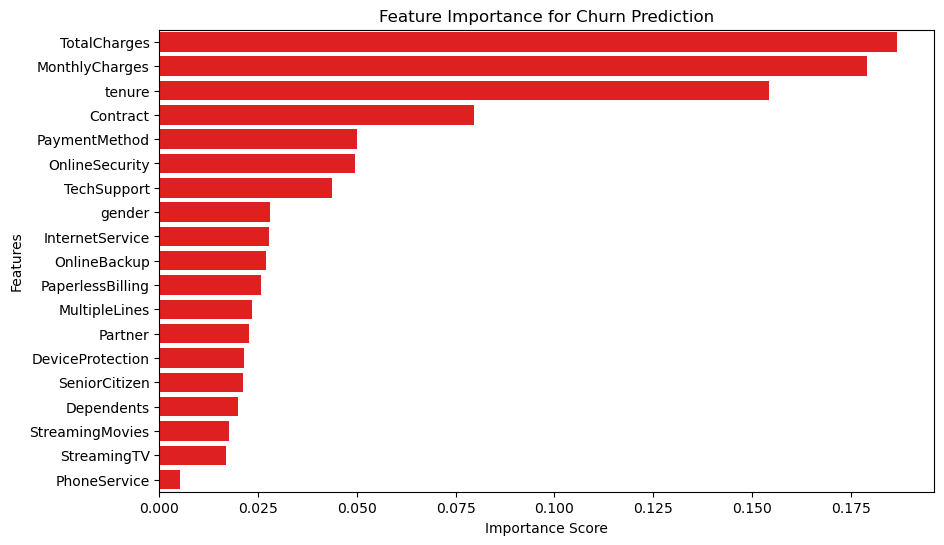

In [65]:
# Feature Importance
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index, color='Red')
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()